# 🧾 MarketPro: Анализ данных и юнит-экономики

## 📍 1. Общая часть

### 🔹 1.1 Описание задачи
Платформа MarketPro анализирует поведение продавцов и покупателей. Цель анализа:
- Рассчитать ключевые бизнес-метрики;
- Провести когортный анализ активности;
- Оценить эффективность модели через CAC, LTV и ROI;
- Выявить зоны для роста и оптимизации.

### 🔹 1.2 Импорт библиотек и загрузка файлов

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пути к файлам
seller_data_path = "/content/drive/MyDrive/Zerocoder/01_Профессии/01_Pyhton для Аналитиков данных/Метрики Данных/M09_Завершающая работа/seller_data.csv"
buyer_cohort_path = "/content/drive/MyDrive/Zerocoder/01_Профессии/01_Pyhton для Аналитиков данных/Метрики Данных/M09_Завершающая работа/cohort_analysis_data.csv"
seller_cohort_path = "/content/drive/MyDrive/Zerocoder/01_Профессии/01_Pyhton для Аналитиков данных/Метрики Данных/M09_Завершающая работа/sellers_cohort_analysis_data.csv"

# Загрузка данных
seller_df = pd.read_csv(seller_data_path)
buyers_df = pd.read_csv(buyer_cohort_path)
sellers_df = pd.read_csv(seller_cohort_path)


## 📍 2. Анализ продавцов (seller_data.csv)

In [5]:

# Расчёты
seller_df["Commission_Absolute"] = seller_df["Order_Value"] * seller_df["Commission_Rate"]
seller_df["Total_Seller_Revenue"] = (
    seller_df["Commission_Absolute"] +
    seller_df["Promotion_Income"] +
    seller_df["Subscription_Income"]
)

avg_check = seller_df["Order_Value"].mean()
avg_commission = seller_df["Commission_Absolute"].mean()
avg_income = seller_df["Total_Seller_Revenue"].mean()
promotion_pct = seller_df["Promotion_Used"].mean() * 100
subscription_pct = seller_df["Subscription"].mean() * 100

print(f"Средний чек: {avg_check:.2f} ₽")
print(f"Средняя комиссия: {avg_commission:.2f} ₽")
print(f"Средний доход с продавца: {avg_income:.2f} ₽")
print(f"% продавцов с продвижением: {promotion_pct:.1f}%")
print(f"% продавцов с подпиской: {subscription_pct:.1f}%")


Средний чек: 2009.67 ₽
Средняя комиссия: 201.39 ₽
Средний доход с продавца: 3338.39 ₽
% продавцов с продвижением: 50.8%
% продавцов с подпиской: 19.9%


### ✅ Выводы
- Средний чек: ~2009 ₽
- Комиссия: ~201 ₽ с заказа
- Доход с одного продавца: ~3338 ₽
- Только 19.9% используют подписку, ~50% — продвижение

### 💡 Рекомендации
- Стимулировать использование подписки через бандлы и демонстрацию выгоды
- Повысить вовлеченность в продвижение через визуализацию ROI
- Ввести программы лояльности

## 📍 3. Анализ юнит-экономики

In [6]:

# Покупатели
marketing_cost = 3_000_000
buyers_per_month = 2000
buyer_retention = 0.2
buyer_lifetime = 24
buyer_ARPU = 2000

# Продавцы
sellers_per_month = 500
seller_retention = 0.4
seller_lifetime = 18
seller_ARPU = avg_income
seller_support_cost = 1000

# CAC
CAC_buyer = marketing_cost / buyers_per_month
CAC_seller = marketing_cost / sellers_per_month

# LTV
LTV_buyer = buyer_ARPU * buyer_lifetime * buyer_retention
LTV_seller_gross = seller_ARPU * seller_lifetime * seller_retention
LTV_seller_net = LTV_seller_gross - (seller_support_cost * seller_lifetime)

# ROI
ROI_buyer = (LTV_buyer - CAC_buyer) / CAC_buyer
ROI_seller = (LTV_seller_net - CAC_seller) / CAC_seller

print(f"Buyer LTV: {LTV_buyer:.0f}, CAC: {CAC_buyer:.0f}, ROI: {ROI_buyer:.2f}")
print(f"Seller LTV (net): {LTV_seller_net:.0f}, CAC: {CAC_seller:.0f}, ROI: {ROI_seller:.4f}")


Buyer LTV: 9600, CAC: 1500, ROI: 5.40
Seller LTV (net): 6036, CAC: 6000, ROI: 0.0061


### ✅ Выводы
- Покупатели: ROI = 5.4 → модель устойчива
- Продавцы: ROI ≈ 0 → модель не приносит прибыли

### 💡 Рекомендации
- Повышать удержание продавцов
- Автоматизировать поддержку
- Развивать upsell и платные функции
- Снизить CAC через реферальные каналы

## 📍 4. Когортный анализ покупателей

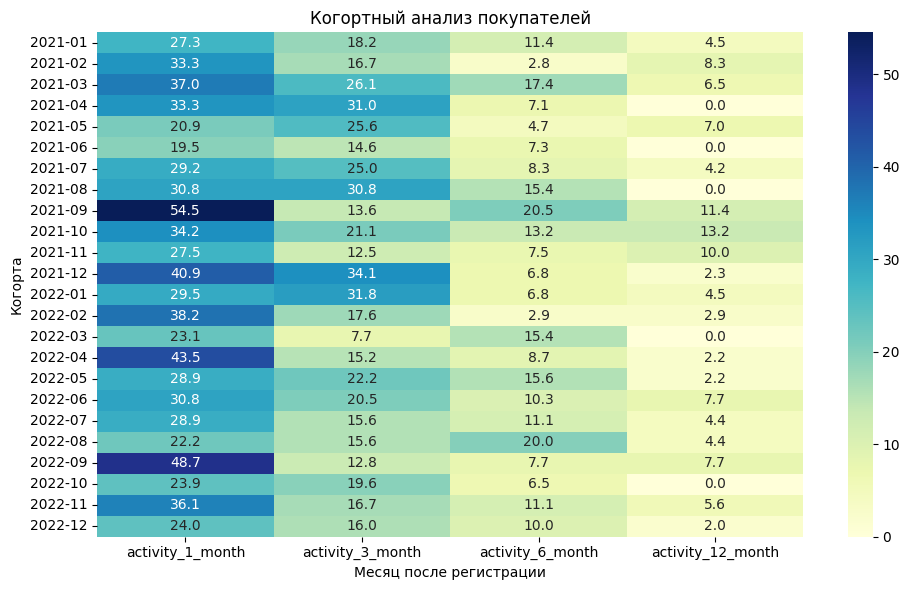

In [7]:

buyers_df["registration_date"] = pd.to_datetime(buyers_df["registration_date"])
buyers_df["cohort_month"] = buyers_df["registration_date"].dt.to_period("M").astype(str)

buyers_cohort = buyers_df.groupby("cohort_month")[[
    "activity_1_month",
    "activity_3_month",
    "activity_6_month",
    "activity_12_month"
]].mean() * 100

plt.figure(figsize=(10, 6))
sns.heatmap(buyers_cohort, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Когортный анализ покупателей")
plt.xlabel("Месяц после регистрации")
plt.ylabel("Когорта")
plt.tight_layout()
plt.show()


### ✅ Выводы
- Активность покупателей резко падает после 1 месяца
- Удержание на 12-м месяце почти нулевое

### 💡 Рекомендации
- Ввести welcome-механику и цепочки писем
- Использовать повторные уведомления и программы лояльности

## 📍 5. Когортный анализ продавцов

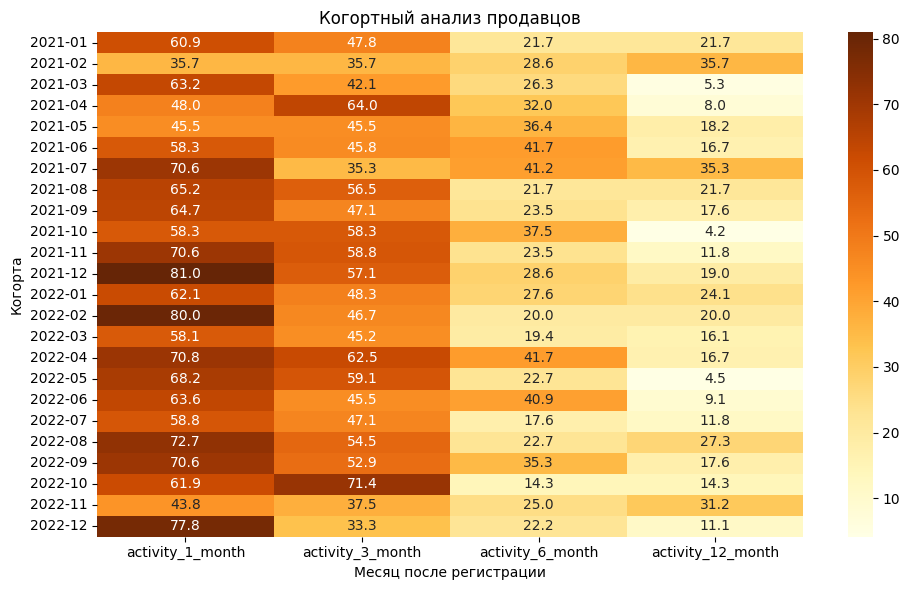

In [8]:

sellers_df["registration_date"] = pd.to_datetime(sellers_df["registration_date"])
sellers_df["cohort_month"] = sellers_df["registration_date"].dt.to_period("M").astype(str)

sellers_cohort = sellers_df.groupby("cohort_month")[[
    "activity_1_month",
    "activity_3_month",
    "activity_6_month",
    "activity_12_month"
]].mean() * 100

plt.figure(figsize=(10, 6))
sns.heatmap(sellers_cohort, annot=True, fmt=".1f", cmap="YlOrBr")
plt.title("Когортный анализ продавцов")
plt.xlabel("Месяц после регистрации")
plt.ylabel("Когорта")
plt.tight_layout()
plt.show()


### ✅ Выводы
- Продавцы быстро теряют интерес
- Активность падает ниже 20% уже к 3-му месяцу

### 💡 Рекомендации
- Ввести онбординг и наставничество
- Автоматизация аналитики для продавца (помощь в принятии решений)
- Ранние бонусы и мотивация на старт

## 📍 6. Финальные выводы и стратегия


### 🔍 Проблемы:
- Низкое удержание у продавцов и покупателей
- Высокие переменные расходы на продавцов
- Недостаточная монетизация

### 🛠 Планы по улучшению:
- Повышение LTV через удержание и платные функции
- Снижение CAC через реферальные и контент-каналы
- Автоматизация поддержки
- Повышение вовлеченности через обучение и рекомендации

Платформа имеет большой потенциал роста при грамотной оптимизации метрик юнит-экономики.
